In [14]:
import numpy as np #importe de libreria
from matplotlib import pyplot as plt #pa plotear
from PIL import Image
from skimage import measure

import cv2


In [15]:
# img=plt.imread('mamo.png')
# plt.imshow(img,cmap='gray')

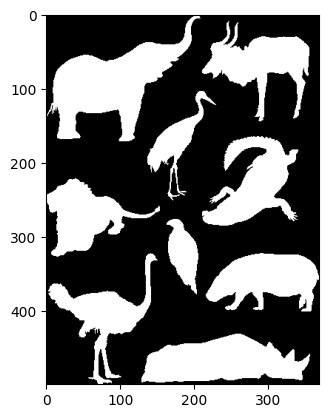

In [16]:
# img=Image.open('mamo.png')
img=Image.open('animales.png').convert('L')
pix_val=list(img.getdata())
img=np.array(img)
plt.imshow(img,cmap='gray')

In [17]:
print("Maximo= ", np.max(pix_val))
print("Minimo= ", np.min(pix_val))

Maximo=  255
Minimo=  0


In [18]:

img=np.array(img)
[n,m]=img.shape
print(n)
print(m)
#convertimos imagen en matriz

500
369


In [19]:
umbral,img_bin=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # plt.imshow(img_bin,cmap='gray')

blobs_labels = measure.label(img_bin, background=0)

# plt.imshow(blobs_labels, cmap="nipy_spectral")
print("Islas numero = ",np.max(blobs_labels))
# plt.axis("off")

kernel = np.array(
        [[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], np.uint8)
print(kernel)

Islas numero =  9
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [20]:
umbral,img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Umbral Otsu = ", umbral)
# plt.imshow(img_bw,cmap="gray")

img_dilate = cv2.dilate(img_bw,kernel,iterations=15)
# plt.imshow(img_dilate,cmap="gray")
blobs_labels = measure.label(img_dilate,background=0)
print("Cantidad de islas = ", np.max(blobs_labels))

Umbral Otsu =  0.0
Cantidad de islas =  1


(-0.5, 368.5, 499.5, -0.5)

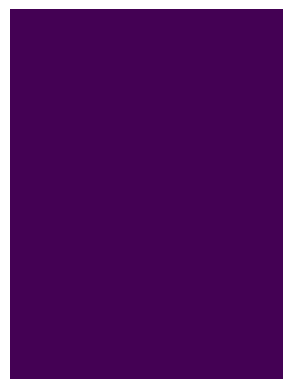

In [21]:
mask = np.where(blobs_labels==1, 0,1)
mask = np.logical_not(mask)
img_maskor = np.copy(img)
img_maskor[mask] = 0
plt.imshow(img_maskor)
plt.axis("off")

(-0.5, 368.5, 499.5, -0.5)

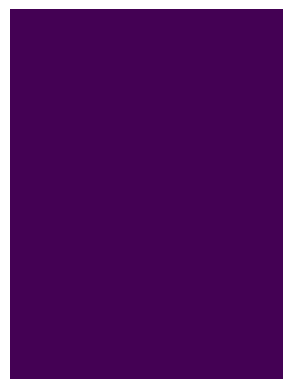

In [22]:


ret,th1 = cv2.threshold(img_maskor,85,255,cv2.THRESH_BINARY)

maskj = np.where(blobs_labels==1, 0,1)
maskj = np.logical_not(th1)
img_mask = np.copy(img_maskor)
img_mask[maskj] = 0
plt.imshow(img_mask)
plt.axis("off")

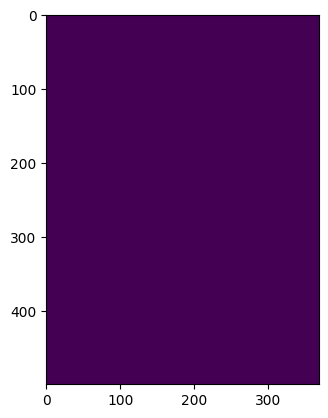

In [23]:
ret2,th2 = cv2.threshold(img_mask,120,255,cv2.THRESH_BINARY)
plt.imshow(th2)

(-0.5, 368.5, 499.5, -0.5)

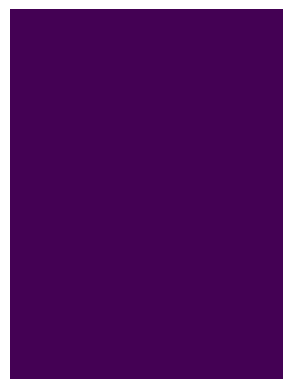

In [24]:
maskj = np.where(blobs_labels==1, 0,1)
maskj = np.logical_not(th2)
img_maskaa = np.copy(img_maskor)
img_maskaa[maskj] = 0
plt.imshow(img_maskaa)
plt.axis("off")


(-0.5, 368.5, 499.5, -0.5)

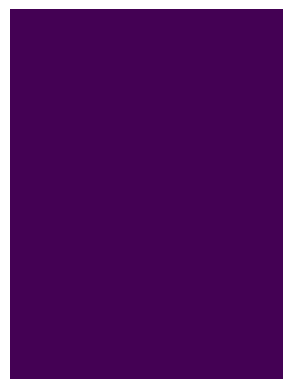

In [25]:
kernel2 = np.ones((6,6), np.uint8)

img_dilate = cv2.dilate(img_maskaa,kernel2,iterations=6)
plt.imshow(img_dilate)
plt.axis("off")

(-0.5, 368.5, 499.5, -0.5)

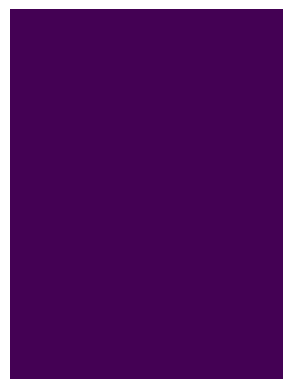

In [26]:
maskj = np.where(blobs_labels==1, 0,1)
maskj = np.logical_not(img_dilate)
img_maskaa = np.copy(img_maskor)
img_maskaa[maskj] = 0
plt.imshow(img_maskaa)
plt.axis("off")